In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np

# Load your CSV
df = pd.read_csv("../averaged_results.csv")

# Define colors
colors = {
    1: 'gold',
    2: 'sandybrown',
    3: 'turquoise',
    4: 'blue',
    5: 'orchid'
}

# Comparison of individual parameter/value pairs

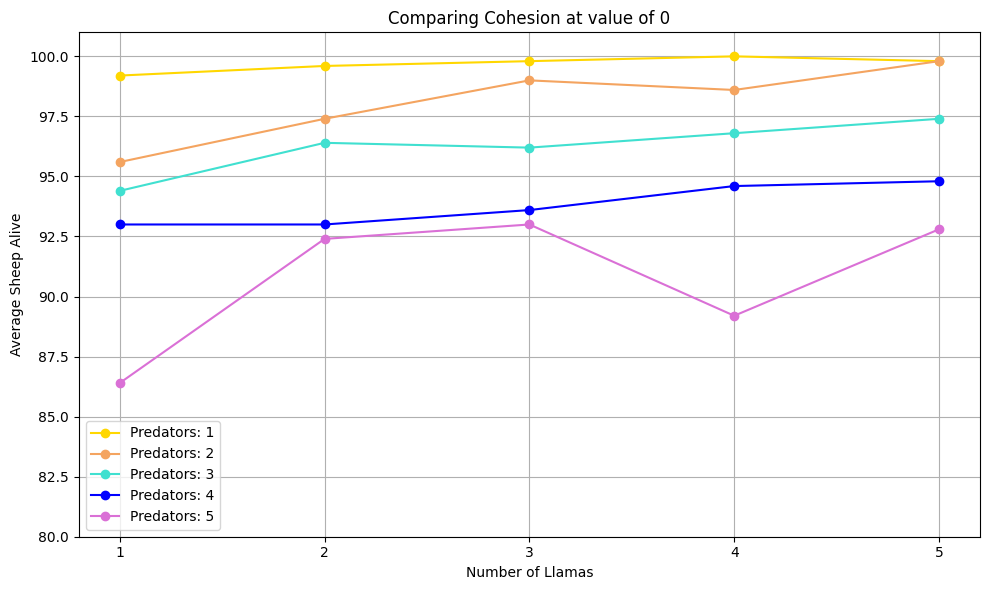

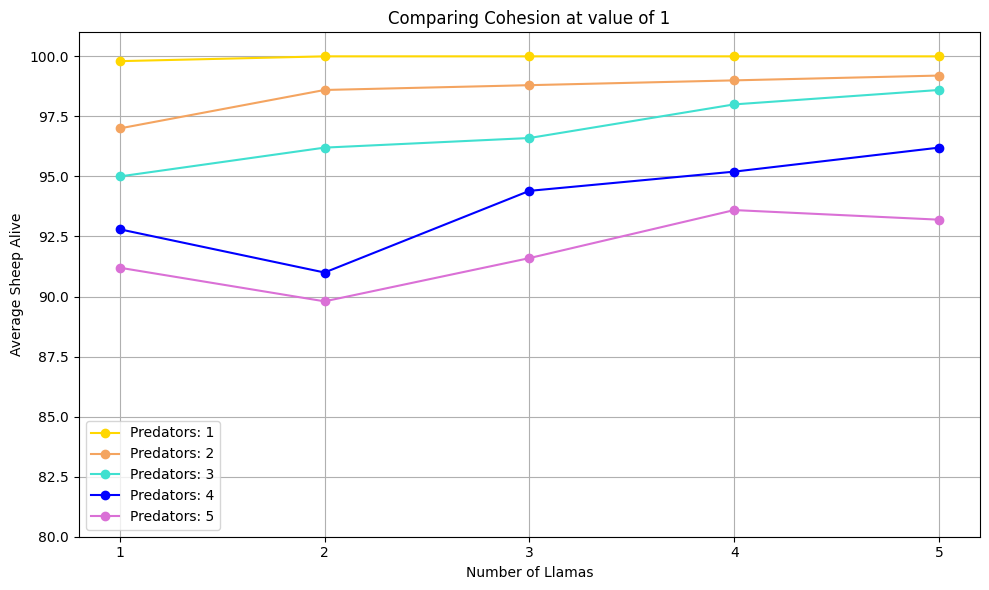

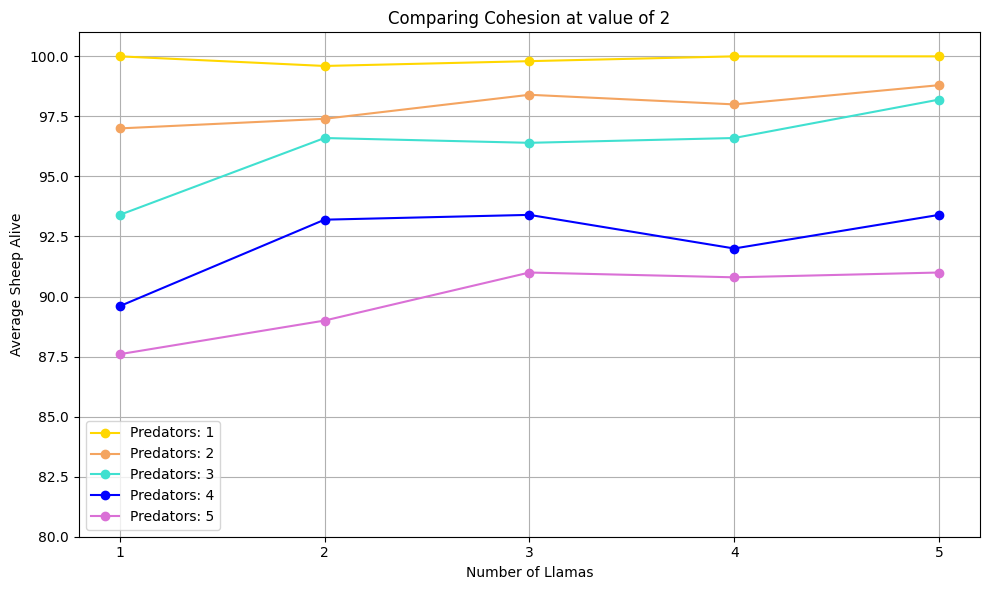

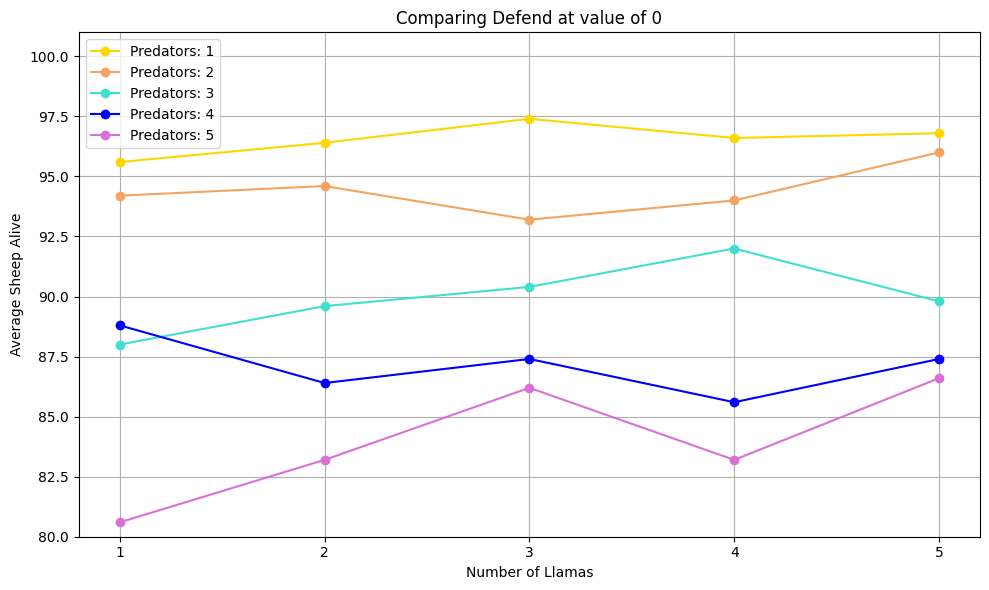

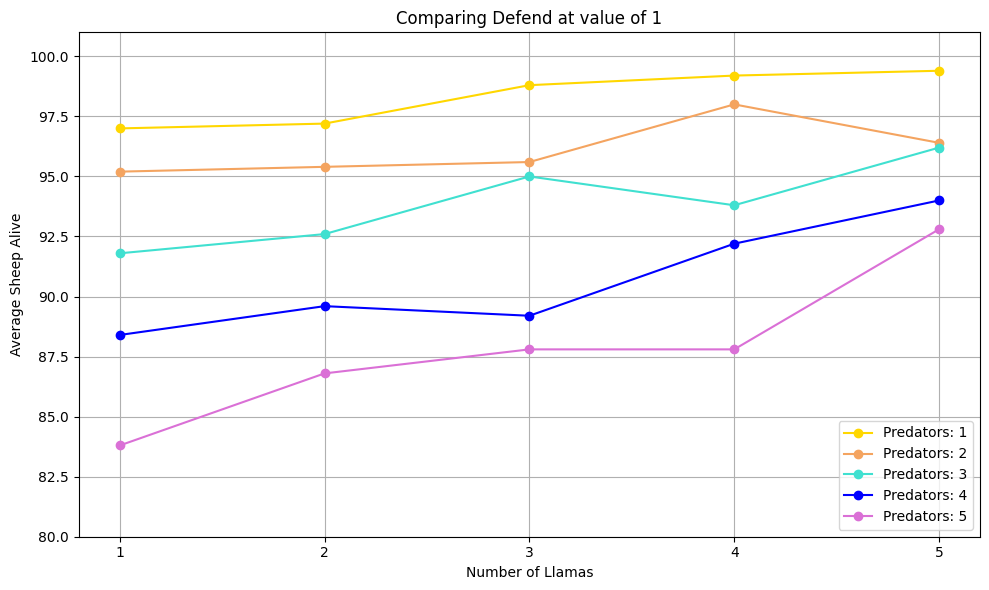

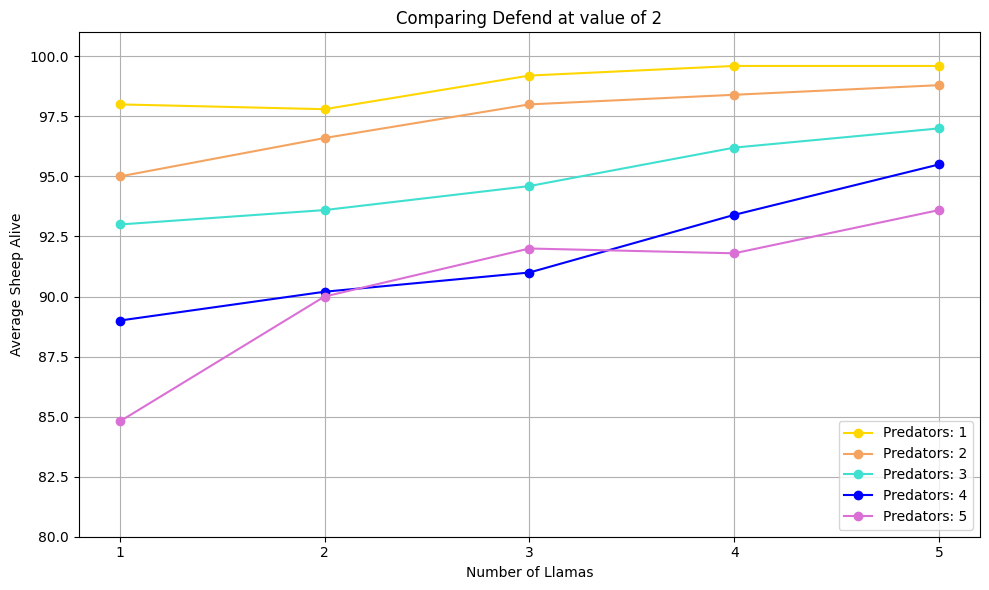

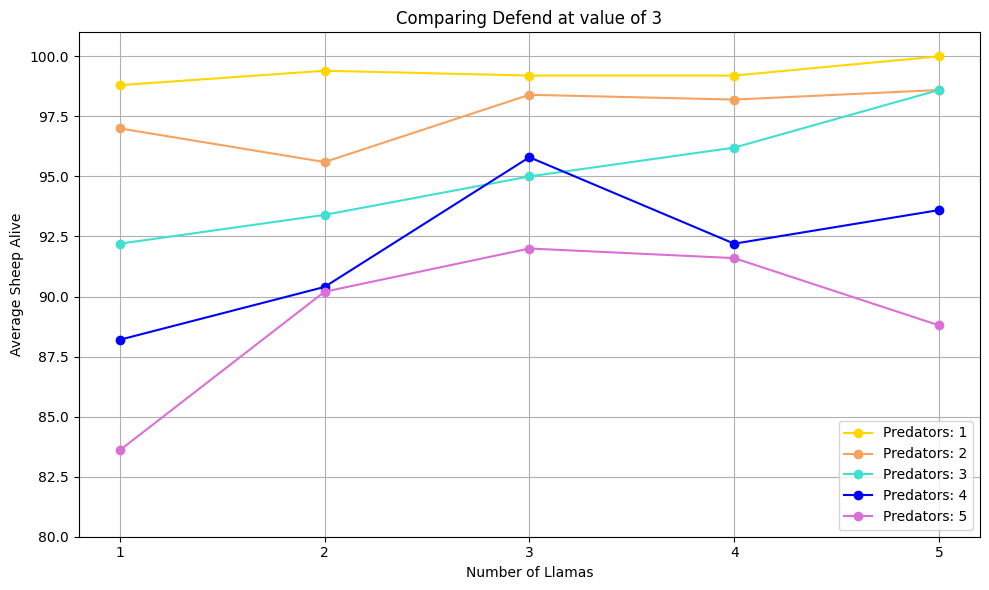

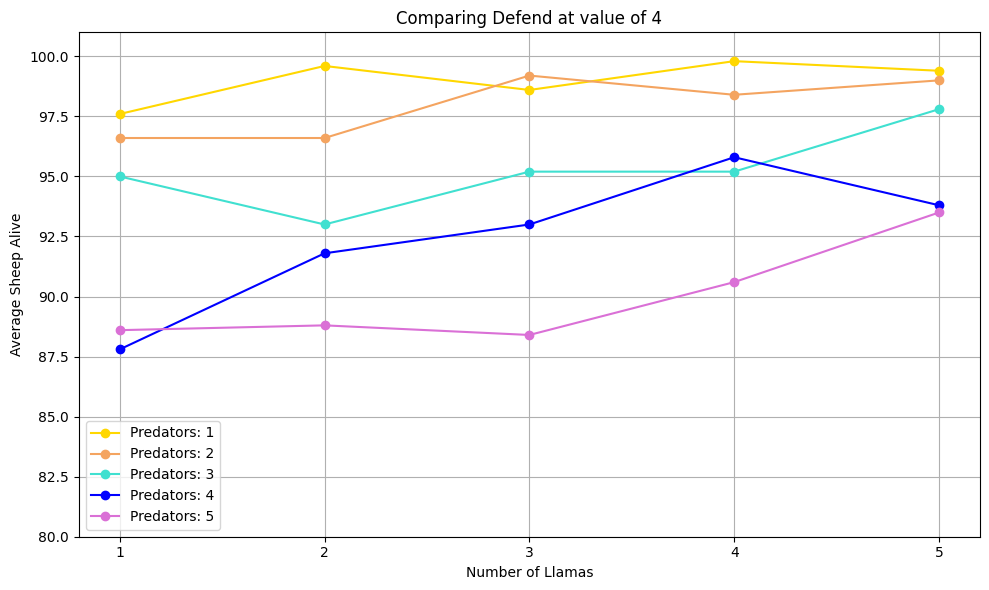

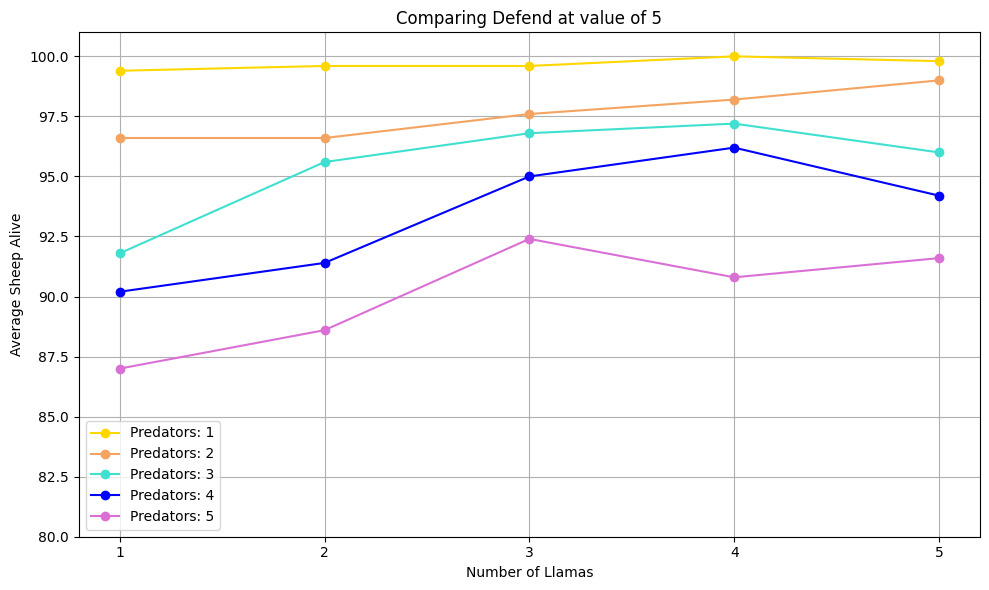

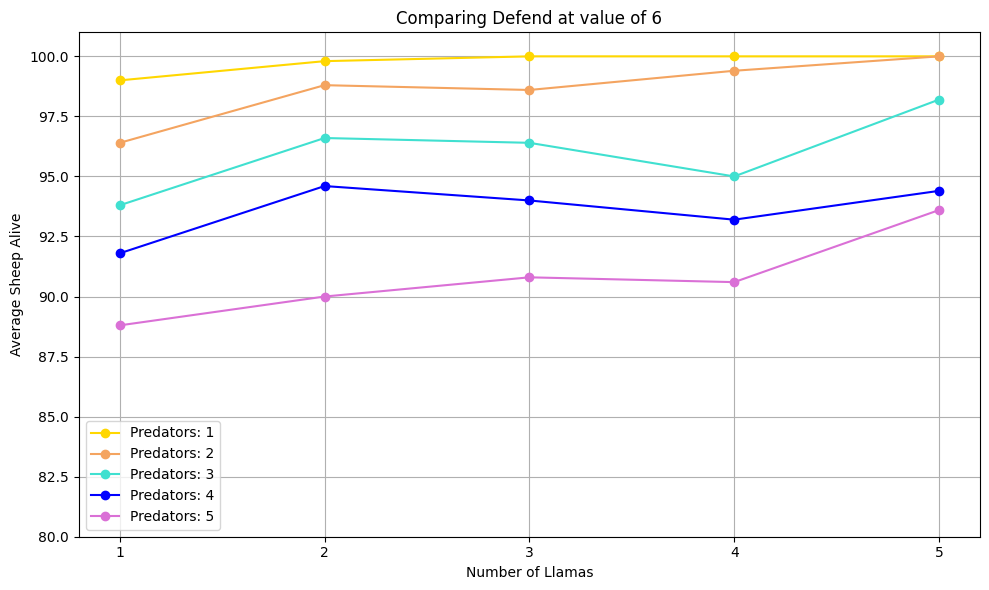

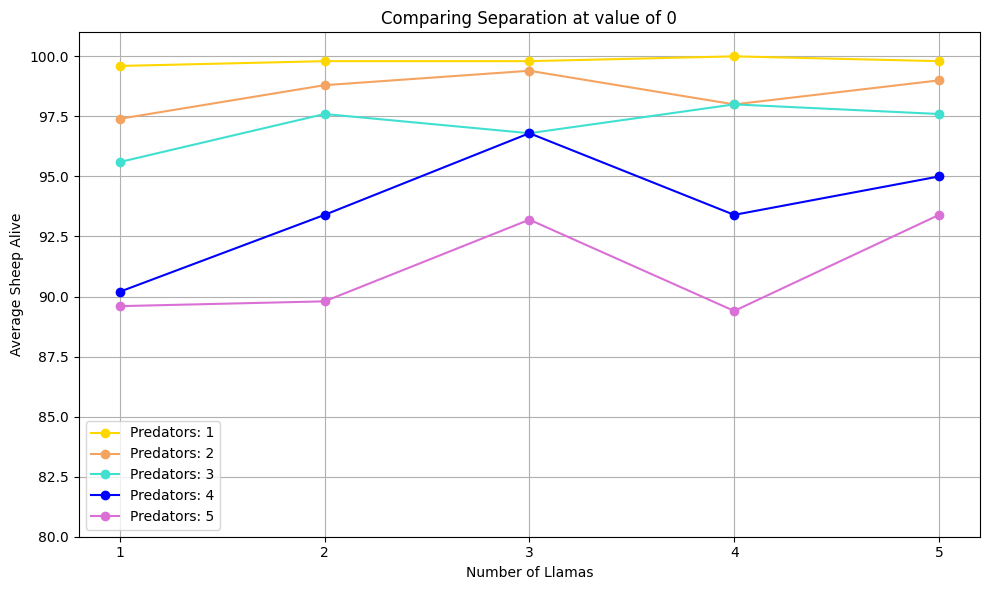

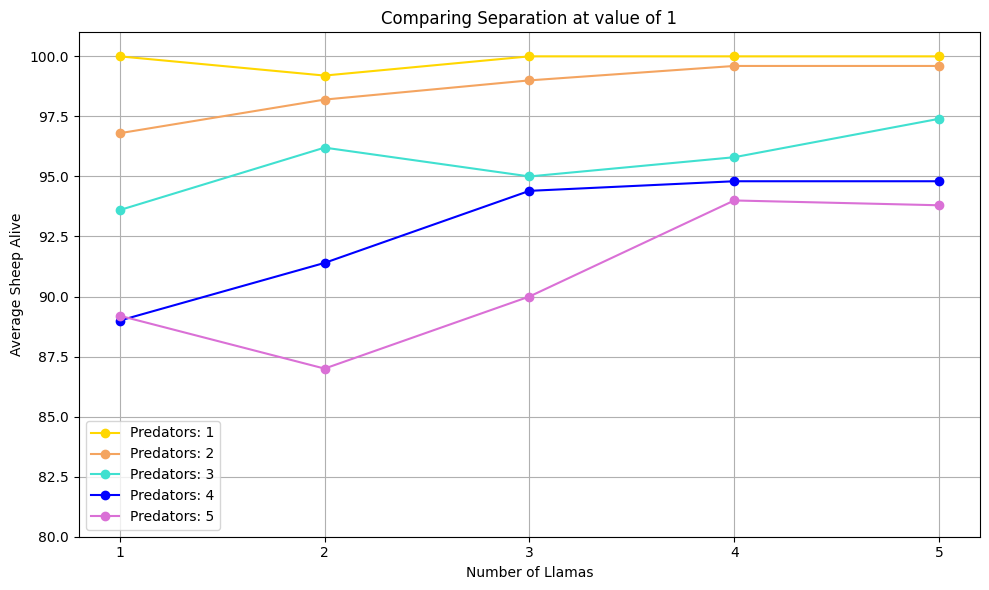

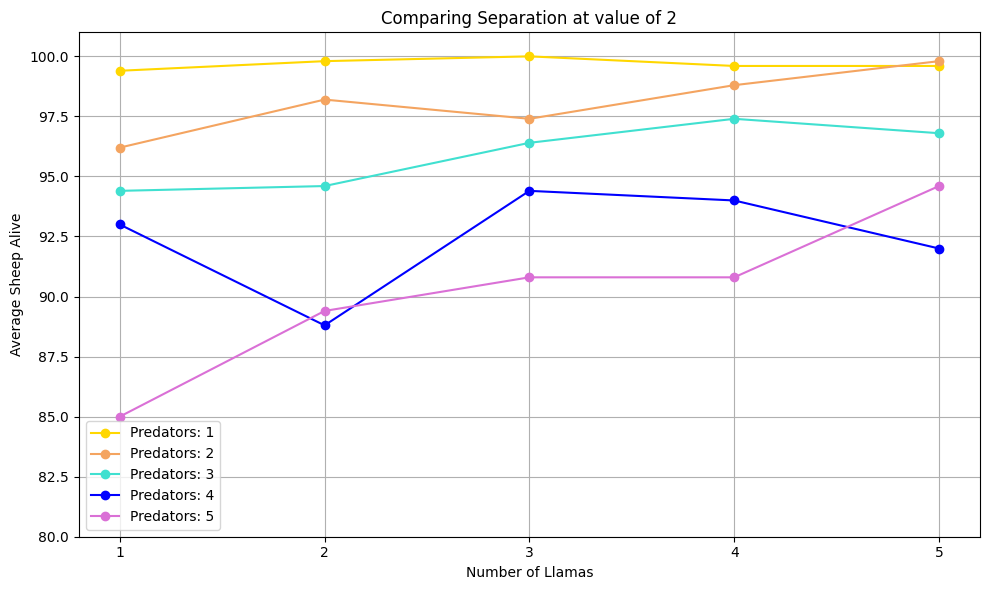

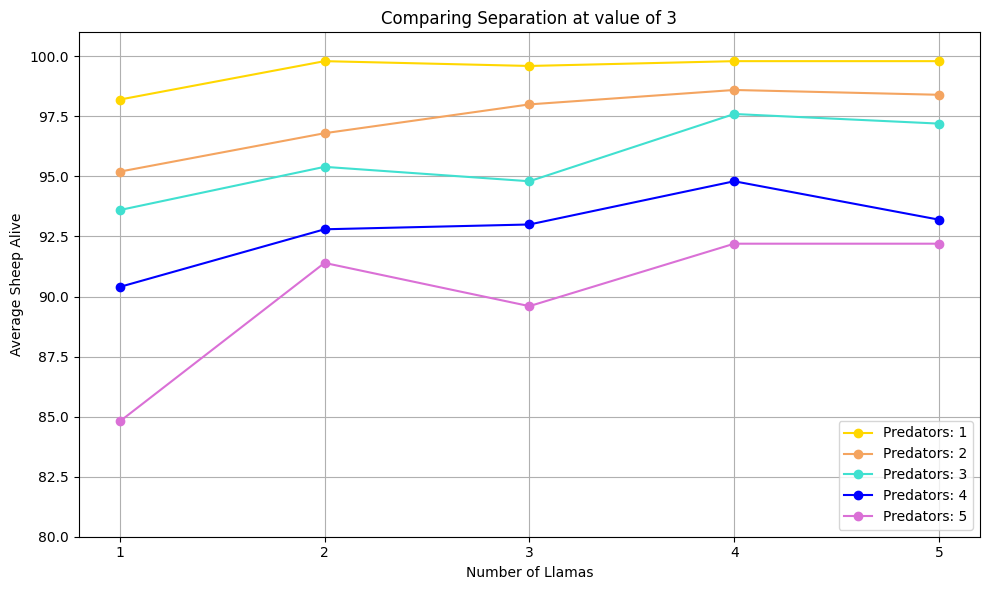

In [14]:
# Group by Parameter and Value
for (parameter, value), group in df.groupby(["Parameter", "Value"]):
    plt.figure(figsize=(10,6))
    
    # Plot one line per Number of Predators
    for predator in sorted(group["Num Predators"].unique()):
        # print(colors.predator)
        sub = group[group["Num Predators"] == predator]
        plt.plot(
            sub["Num llamas"],
            sub["Average Sheep Alive"],
            label=f"Predators: {predator}",
            marker='o',
            color=colors[predator]
        )

    plt.title(f"Comparing {parameter} at value of {value}")
    plt.xlabel("Number of Llamas")
    plt.ylabel("Average Sheep Alive")
    plt.legend()
    plt.ylim(80, 101)
    plt.xticks([1, 2, 3, 4, 5])
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

# Graphs for each parameter combined

In [37]:
# Define colors
colors = {
    1: 'red',
    2: 'royalblue',
    3: 'mediumspringgreen',
    4: 'yellow',
    5: 'slategrey'
}
import colorsys

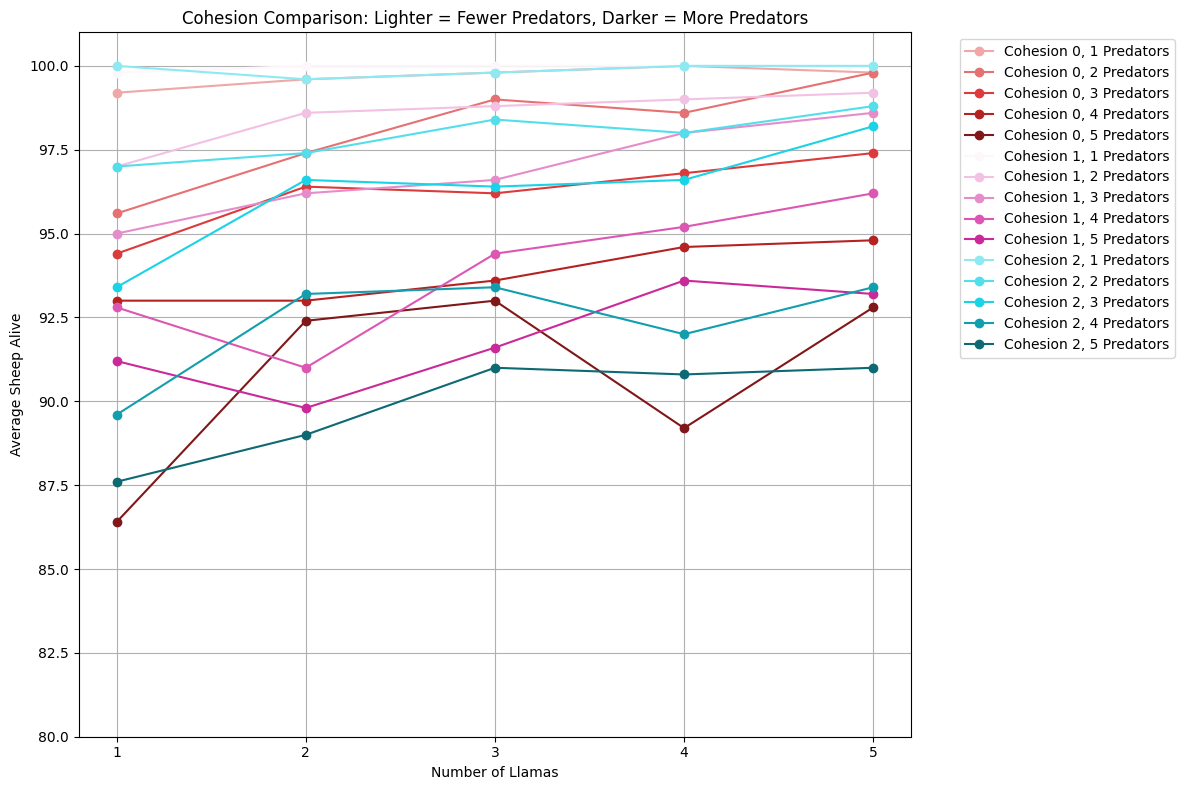

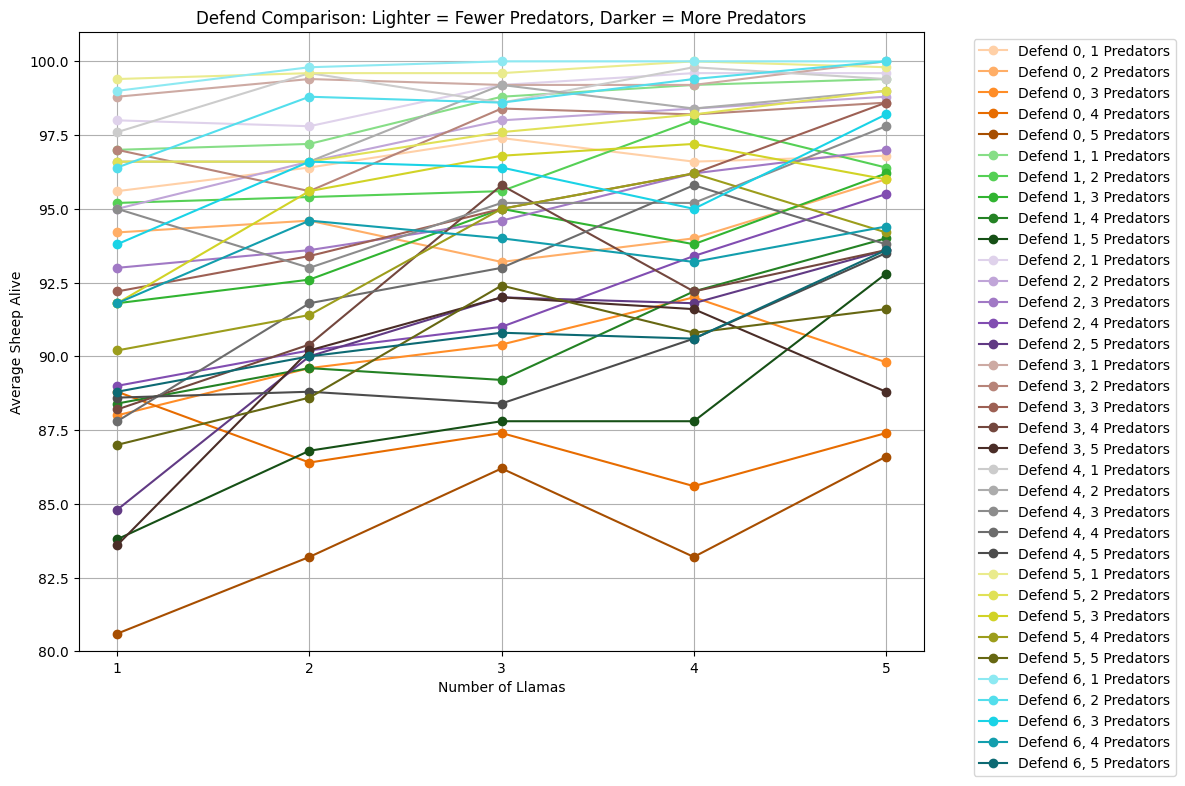

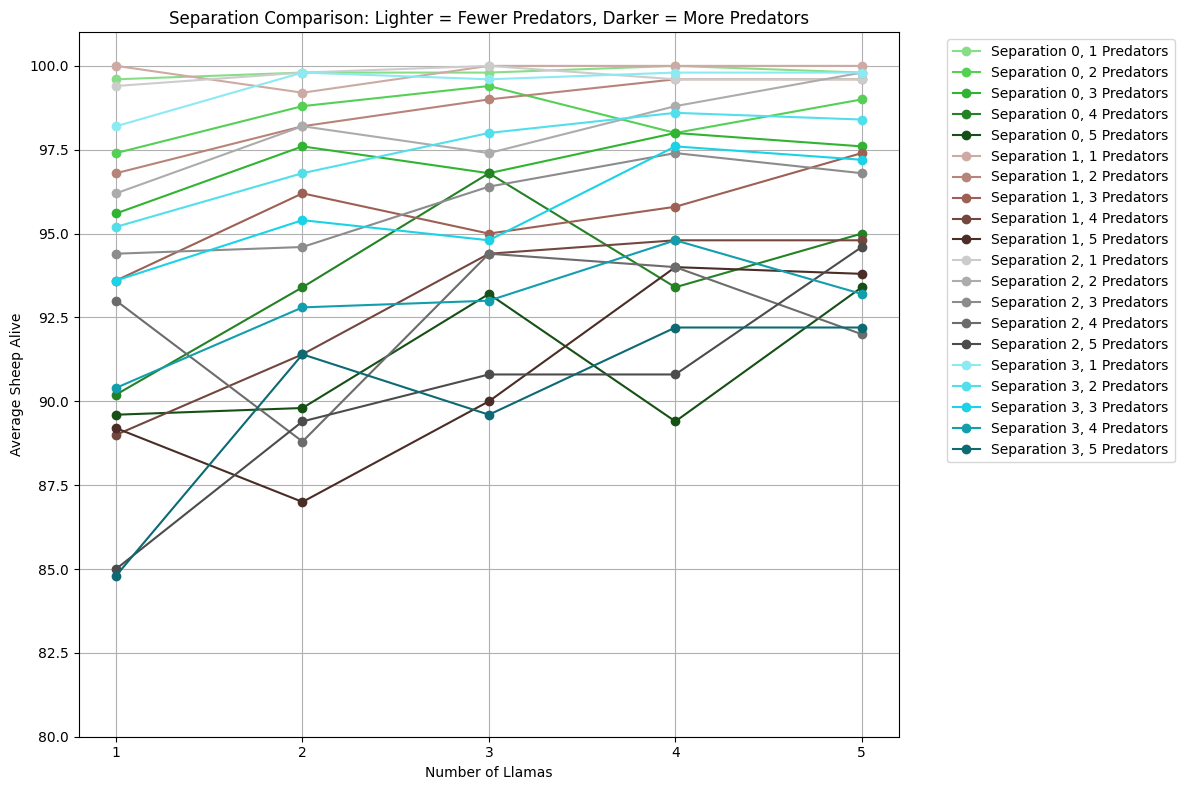

In [40]:
# Filter for Cohesion only
cohesion_df = df[df["Parameter"] == "Cohesion"]

def get_gradient_around_color(base_color, n_colors=5):
    base_rgb = mcolors.to_rgb(base_color)
    h, l, s = colorsys.rgb_to_hls(*base_rgb)

    # Generate lightness values centered around l
    lightness_values = np.linspace(min(1, l + 0.3), max(0, l - 0.2), n_colors)

    gradient = [colorsys.hls_to_rgb(h, new_l, s) for new_l in lightness_values]
    return gradient

# Normalize number of predators for darkening the color
def adjust_color(base_color, num_predators):
    # Make it darker depending on the number of predators (scale from 1 -> 5)
    index = num_predators - 1
    return base_color[index]

# Automatically find all unique parameters
parameters = df["Parameter"].unique()

# Loop through each parameter
for param in parameters:
    param_df = df[df["Parameter"] == param]

    # Map each parameter value to a base color
    param_values = sorted(param_df["Value"].unique())
    
    # Pick some base colors for each value (you could improve this by using a palette)
    colors = plt.cm.tab10(np.linspace(0, 1, len(param_values) + 1))
    value_to_color = {value: colors[i+1] for i, value in enumerate(param_values)}
    value_to_colors = {value: get_gradient_around_color(base_color) for value, base_color in value_to_color.items()}
    
    # Start plotting
    plt.figure(figsize=(12,8))
    
    for (param_value, num_predators), group in param_df.groupby(["Value", "Num Predators"]):
        sub = group
        color = adjust_color(value_to_colors[param_value], num_predators)

        plt.plot(
            sub["Num llamas"],
            sub["Average Sheep Alive"],
            label=f"{param} {param_value}, {num_predators} Predators",
            color=color,
            marker='o'
        )

    plt.title(f"{param} Comparison: Lighter = Fewer Predators, Darker = More Predators")
    plt.xlabel("Number of Llamas")
    plt.ylabel("Average Sheep Alive")
    plt.ylim(80, 101)
    plt.xticks([1, 2, 3, 4, 5])
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()